In [1]:
import pandas as pd
supply_chain_data = pd.read_csv(r"K:\Excel_KD\supply_chain_optimzation\Data\supply_chain_data_merged.csv")

C:\Users\kedar\AppData\Local\Temp\ipykernel_21908\1842546534.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  supply_chain_data = pd.read_csv(r"K:\Excel_KD\supply_chain_optimzation\Data\supply_chain_data_merged.csv")


In [4]:
supply_chain_data.dtypes

Payment_Type                    object
Days_for_shipping_real           int64
Days_for_shipment_scheduled      int64
Benefit_per_order              float64
Sales_per_customer             float64
Delivery_Status                 object
Late_delivery_risk               int64
Category_Id                      int64
Category_Name                   object
Customer_City                   object
Customer_Country                object
Customer_Email                  object
Customer_Fname                  object
Customer_Id                      int64
Customer_Lname                  object
Customer_Password               object
Customer_Segment                object
Customer_State                  object
Customer_Street                 object
Customer_Zipcode               float64
Department_Id                    int64
Department_Name                 object
Latitude                       float64
Longitude                      float64
Market                          object
Order_City               

In [5]:

print("Missing Values:")
print(supply_chain_data.isnull().sum())

#threshold = 0.3  
#supply_chain_data = supply_chain_data.loc[:, supply_chain_data.isnull().mean() < threshold]

#supply_chain_data['Order Profit Per Order'] = supply_chain_data['Order Profit Per Order'].fillna(0)

#print("After handling missing values:")
#print(supply_chain_data.isnull().sum())



Missing Values:
Payment_Type                        0
Days_for_shipping_real              0
Days_for_shipment_scheduled         0
Benefit_per_order                   0
Sales_per_customer                  0
Delivery_Status                     0
Late_delivery_risk                  0
Category_Id                         0
Category_Name                       0
Customer_City                       0
Customer_Country                    0
Customer_Email                      0
Customer_Fname                      0
Customer_Id                         0
Customer_Lname                      8
Customer_Password                   0
Customer_Segment                    0
Customer_State                      0
Customer_Street                     0
Customer_Zipcode                    3
Department_Id                       0
Department_Name                     0
Latitude                            0
Longitude                           0
Market                              0
Order_City                        

In [6]:
supply_chain_data = supply_chain_data.dropna(subset=['order_date'])
print(supply_chain_data.isnull().sum())

Payment_Type                       0
Days_for_shipping_real             0
Days_for_shipment_scheduled        0
Benefit_per_order                  0
Sales_per_customer                 0
Delivery_Status                    0
Late_delivery_risk                 0
Category_Id                        0
Category_Name                      0
Customer_City                      0
Customer_Country                   0
Customer_Email                     0
Customer_Fname                     0
Customer_Id                        0
Customer_Lname                     6
Customer_Password                  0
Customer_Segment                   0
Customer_State                     0
Customer_Street                    0
Customer_Zipcode                   1
Department_Id                      0
Department_Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order_City                         0
Order_Country                      0
O

In [9]:
supply_chain_data["Order_Year"] = supply_chain_data["Order_Year"].astype(int)
supply_chain_data["Order_Month"] = supply_chain_data["Order_Month"].astype(int)

In [10]:
supply_chain_data.dtypes

Payment_Type                    object
Days_for_shipping_real           int64
Days_for_shipment_scheduled      int64
Benefit_per_order              float64
Sales_per_customer             float64
Delivery_Status                 object
Late_delivery_risk               int64
Category_Id                      int64
Category_Name                   object
Customer_City                   object
Customer_Country                object
Customer_Email                  object
Customer_Fname                  object
Customer_Id                      int64
Customer_Lname                  object
Customer_Password               object
Customer_Segment                object
Customer_State                  object
Customer_Street                 object
Customer_Zipcode               float64
Department_Id                    int64
Department_Name                 object
Latitude                       float64
Longitude                      float64
Market                          object
Order_City               

In [4]:
supply_chain_data.drop("Customer Email",axis=1,inplace=True)
supply_chain_data.drop("Customer Fname",axis=1,inplace=True)
supply_chain_data.drop("Customer Lname",axis=1,inplace=True)
supply_chain_data.drop("Customer Password",axis=1,inplace=True)
supply_chain_data.drop("Product Image", axis=1,inplace=True)

In [5]:
new_df = supply_chain_data

In [6]:
numerical_features = [f for f in supply_chain_data.columns if supply_chain_data[f].dtypes!='O']
cat_features = [c for c in supply_chain_data.columns if supply_chain_data[c].dtypes=='O']
print("Numerical: ",numerical_features)
print(" ")
print("Categorical: ",cat_features)

Numerical:  ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status']
 
Categorical:  ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode']


In [7]:
for column in cat_features:
    unique_values = supply_chain_data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Type
Unique Values: ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Column: Delivery Status
Unique Values: ['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Column: Category Name
Unique Values: ['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']

Column: Customer C

In [8]:
supply_chain_data["order date"] = pd.to_datetime(
    supply_chain_data["order date (DateOrders)"],
    format="%d-%m-%Y %H:%M",  
    errors="coerce"  
)
supply_chain_data["shipping date"] = pd.to_datetime(
    supply_chain_data["shipping date (DateOrders)"],
    format="%d-%m-%Y %H:%M",
    errors="coerce"
)

supply_chain_data=supply_chain_data.sort_values(by="order date")
supply_chain_data.drop("order date (DateOrders)",axis=1,inplace=True)
supply_chain_data.drop("shipping date (DateOrders)",axis=1,inplace=True)

In [9]:
print(supply_chain_data.dtypes)

Type                                     object
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                          object
Late_delivery_risk                        int64
Category Id                               int64
Category Name                            object
Customer City                            object
Customer Country                         object
Customer Id                               int64
Customer Segment                         object
Customer State                           object
Customer Street                          object
Customer Zipcode                        float64
Department Id                             int64
Department Name                          object
Latitude                                float64
Longitude                               float64
Market                                  

In [10]:

supply_chain_data['Shipping Delay'] = supply_chain_data['Days for shipping (real)'] - supply_chain_data['Days for shipment (scheduled)']
supply_chain_data['Shipping Delay'] = supply_chain_data['Shipping Delay'].apply(lambda x: max(x, 0))

# High-Risk Indicator for Late Deliveries
supply_chain_data['High Risk'] = (supply_chain_data['Late_delivery_risk'] > 0).astype(int)

# Profit Margin Percentage
supply_chain_data['Profit Margin'] = (supply_chain_data['Order Profit Per Order'] / supply_chain_data['Sales']) * 100

# Year and Month of Orders
supply_chain_data['Order Year'] = supply_chain_data['order date'].dt.year
supply_chain_data['Order Month'] = supply_chain_data['order date'].dt.month

# Verify new features
print("New Features Summary:")
print(supply_chain_data[['Shipping Delay', 'High Risk', 'Profit Margin', 'Order Year', 'Order Month']].head())


New Features Summary:
        Shipping Delay  High Risk  Profit Margin  Order Year  Order Month
33833                0          0      29.598639      2015.0          1.0
87884                0          0      28.056004      2015.0          1.0
77011                0          0      45.592279      2015.0          1.0
109322               0          0      27.300000      2015.0          1.0
95938                1          1      40.180000      2015.0          1.0


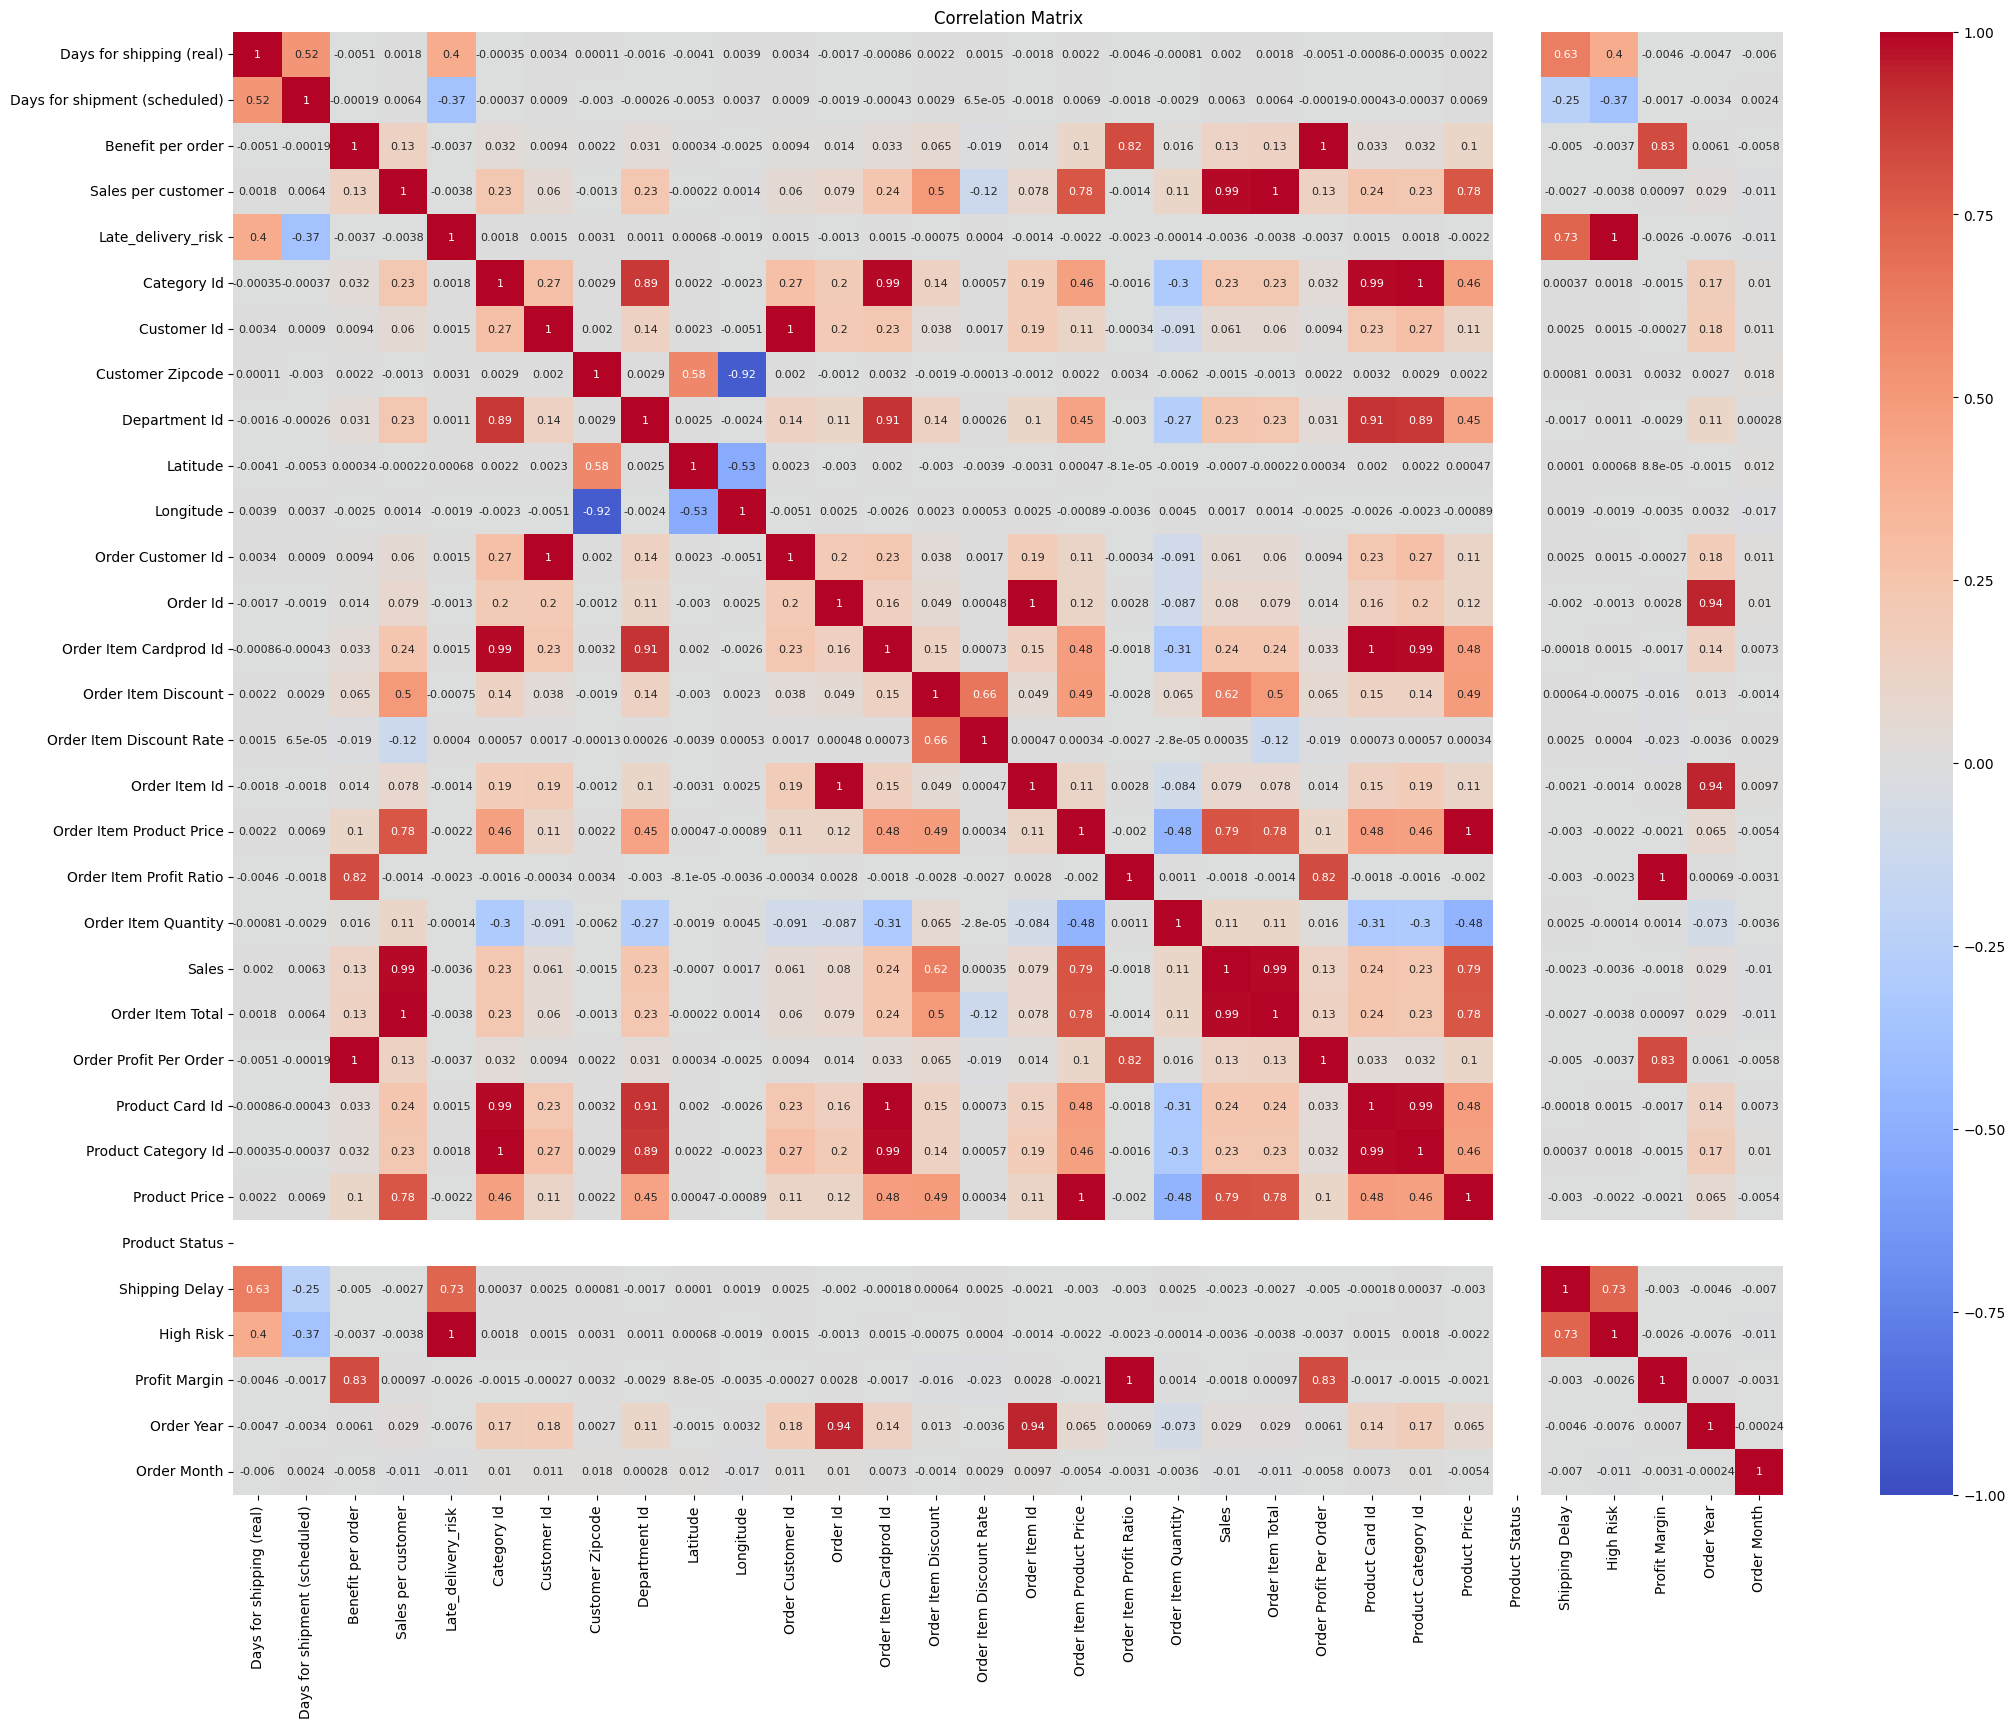

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df_numeric = supply_chain_data.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(25, 19))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [12]:
supply_chain_data.drop(["Benefit per order","Sales per customer","Order Item Cardprod Id","Order Item Product Price","Product Category Id","Order Customer Id"],axis=1,inplace=True)

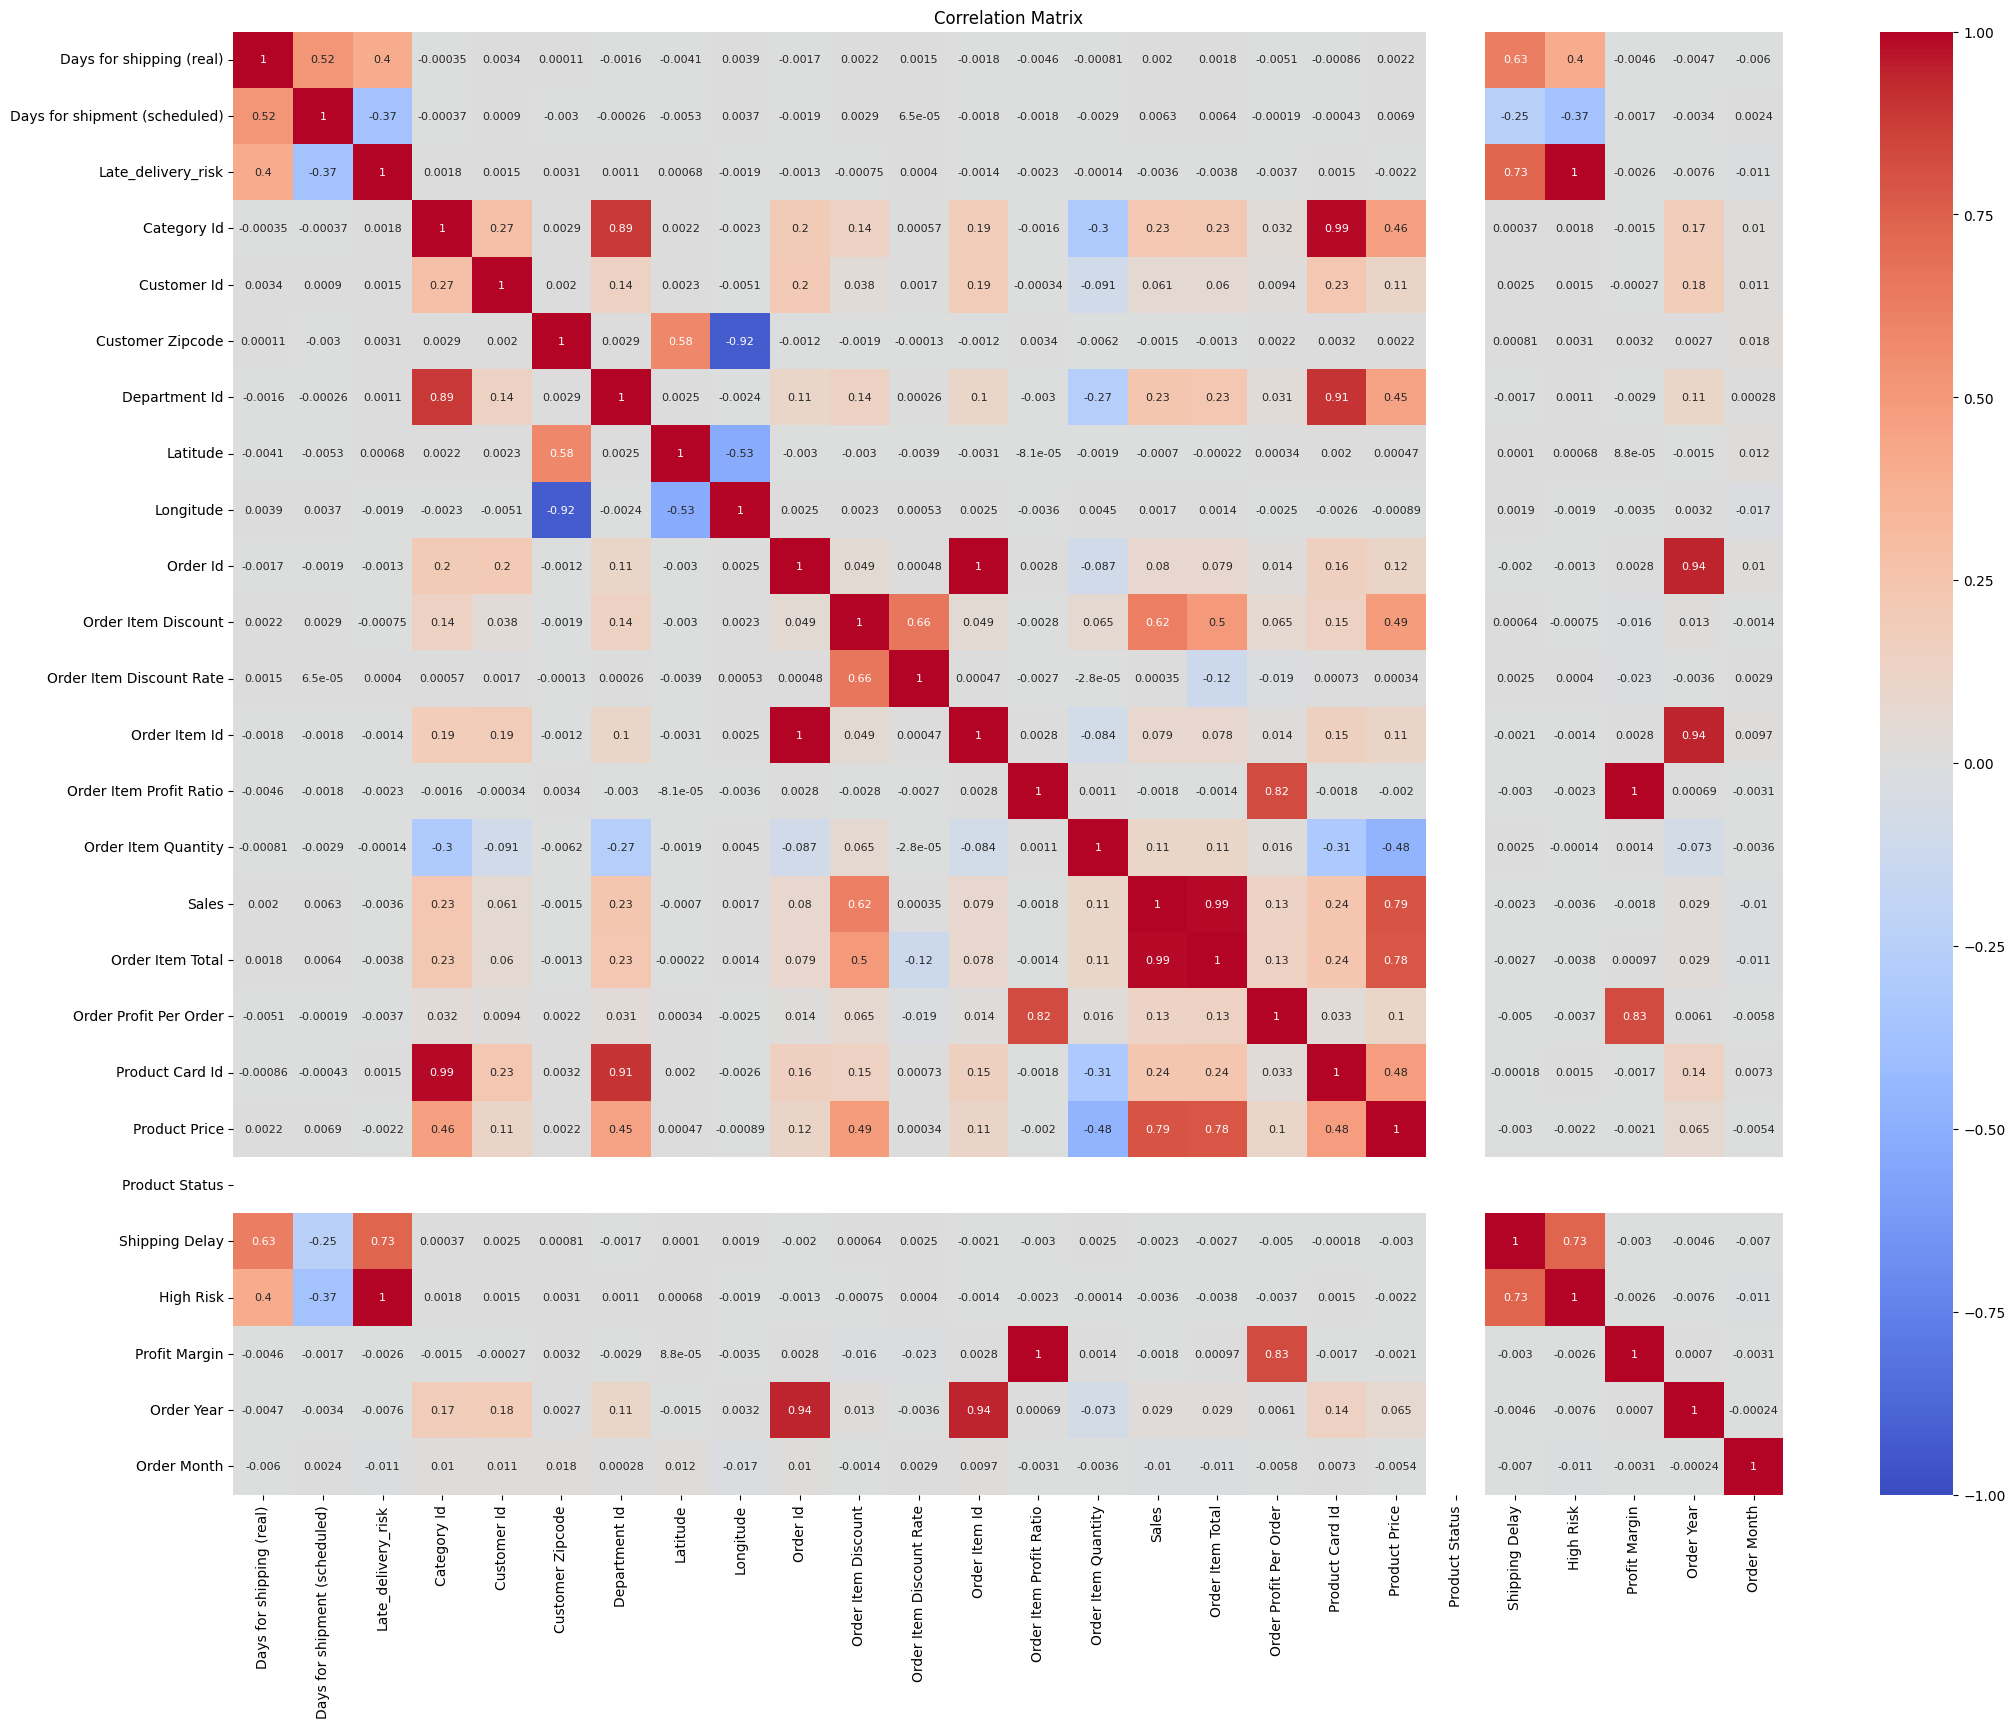

In [13]:
df_numeric = supply_chain_data.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(25, 19))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [14]:
supply_chain_data.drop("Product Status",axis=1,inplace=True)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["columns"]=['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']
vif["vif value"] = [variance_inflation_factor(supply_chain_data[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].values, i) for i in range(len(vif["columns"]))]
vif.T

,0,1,2,3,4,5,6,7
columns,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
vif value,389415821.949077,6.126471,3.410618,12.809224,25472272275.347256,20690128715.483124,3.413,24.873511


In [16]:
supply_chain_data.drop(["Order Item Total","Product Price","Order Item Discount Rate"],axis=1,inplace=True)

In [17]:
vif=pd.DataFrame()
vif["columns"]=['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']
vif["data"] = [variance_inflation_factor(supply_chain_data[['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']].values, i) for i in range(len(vif["columns"]))]
vif

,columns,data
0,Sales,4.200158
1,Order Item Quantity,2.124456
2,Order Item Discount,3.068174
3,Order Item Profit Ratio,1.052867


In [18]:
import numpy as np
data = supply_chain_data[['Product Name', 'Sales', 'Days for shipping (real)', 'order date']].copy()

grouped_data = data.groupby('Product Name').agg({
    'Sales': 'sum',
    'Days for shipping (real)': 'mean',
    'order date': 'count' 
})

grouped_data['DemandRate'] = grouped_data['Sales'] / grouped_data['order date']

grouped_data['LeadTime'] = grouped_data['Days for shipping (real)']

data['Date'] = pd.to_datetime(data['order date'])
data['DailySales'] = data.groupby(['Product Name', data['Date'].dt.date])['Sales'].transform('sum')

std_dev_demand = data.groupby('Product Name')['DailySales'].std()
grouped_data['StdDevDemand'] = std_dev_demand


Z = 1.96

grouped_data['SafetyStock'] = Z * grouped_data['StdDevDemand'] * np.sqrt(grouped_data['LeadTime'])
grouped_data['ReorderPoint'] = grouped_data['LeadTime'] * grouped_data['DemandRate'] + grouped_data['SafetyStock']
grouped_data[['DemandRate', 'LeadTime', 'StdDevDemand', 'SafetyStock', 'ReorderPoint']]

,DemandRate,LeadTime,StdDevDemand,SafetyStock,ReorderPoint
Product Name,,,,,
Adult dog supplies,113.766577,3.388211,1215.078413,4383.748447,4769.213659
Baby sweater,149.140980,3.149758,1195.026233,4156.924488,4626.682551
Bag Boy Beverage Holder,164.973045,3.602151,66.302705,246.642691,840.900434
Bag Boy M330 Push Cart,519.934998,3.391304,156.061525,563.294229,2326.552047
Bowflex SelectTech 1090 Dumbbells,1999.966634,3.500000,0.000000,0.000000,6999.883219
...,...,...,...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,265.312530,3.461832,62.383894,227.500076,1145.967497
adidas Men's F10 Messi TRX FG Soccer Cleat,489.831406,3.511475,140.230730,515.043704,2235.074640
adidas Men's Germany Black Crest Away Tee,214.750000,3.692042,81.666667,307.563071,1100.428988


In [19]:
columns_to_drop = ['Customer City', 'Customer Country','Customer State',
                   'Customer Street', 'Department Name', 'Order City',
                   'Order Country', 'order date','Product Name', 'shipping date']
new_df = new_df.drop(columns=columns_to_drop).copy()

In [45]:
new_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,20755,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,19491,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,19490,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,19489,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,1005,...,40.000000,Eastern Asia,Shanghái,CLOSED,1004,45,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,9141,...,-613.770019,Eastern Asia,Osaka,COMPLETE,1004,45,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,291,...,141.110001,Oceania,Australia del Sur,PENDING,1004,45,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,2813,...,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,1004,45,399.980011,0,1/18/2016 20:18,Standard Class


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_df = new_df.copy()  
for column in new_df.columns:
    if new_df[column].dtype == 'object':  
        encoded_df[column] = label_encoder.fit_transform(new_df[column])

encoded_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3,4,91.250000,314.640015,0,0,73,40,20755,...,91.250000,15,475,2,1360,73,327.750000,0,3250,3
1,3,5,4,-249.089996,311.359985,1,1,73,40,19492,...,-249.089996,13,841,5,1360,73,327.750000,0,20134,3
2,0,4,4,-247.779999,309.720001,3,0,73,40,19491,...,-247.779999,13,841,1,1360,73,327.750000,0,19905,3
3,1,3,4,22.860001,304.809998,0,0,73,40,19490,...,22.860001,11,835,2,1360,73,327.750000,0,19677,3
4,2,2,4,134.210007,298.250000,0,0,73,40,19489,...,134.210007,11,835,6,1360,73,327.750000,0,19453,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,3,0,45,18,1005,...,40.000000,7,913,1,1004,45,399.980011,0,20487,3
180515,1,3,2,-613.770019,395.980011,1,1,45,18,9141,...,-613.770019,7,770,2,1004,45,399.980011,0,20264,2
180516,3,5,4,141.110001,391.980011,1,1,45,18,291,...,141.110001,11,88,5,1004,45,399.980011,0,20481,3
180517,2,3,4,186.229996,387.980011,0,0,45,18,2813,...,186.229996,11,88,6,1004,45,399.980011,0,20039,3


In [22]:
encoded_df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer Id                      0
Customer Segment                 0
Customer Zipcode                 3
Department Id                    0
Latitude                         0
Longitude                        0
Market                           0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Ord

In [23]:
def custom_mode(column):
    frequency = {}
    for value in column:
        if pd.notnull(value):  
            frequency[value] = frequency.get(value, 0) + 1
    
    max_freq = max(frequency.values())
    mode_values = [key for key, value in frequency.items() if value == max_freq]    
    return mode_values

encoded_df['Customer Zipcode'].fillna(custom_mode(encoded_df['Customer Zipcode'])[0], inplace=True)

C:\Users\kedar\AppData\Local\Temp\ipykernel_19776\1549210209.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encoded_df['Customer Zipcode'].fillna(custom_mode(encoded_df['Customer Zipcode'])[0], inplace=True)


In [24]:
columns = [
    'Type',
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Market',
    'Order Item Discount',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Sales',
    'Order Profit Per Order',
    'Order Status',
]

In [25]:
def mean(data):
    return sum(data) / len(data)

def median(data):
    data = sorted(data)
    n = len(data)
    return (data[n//2 - 1] + data[n//2]) / 2 if n % 2 == 0 else data[n//2]

def mode(data):
    freq = {}
    for x in data:
        freq[x] = freq.get(x, 0) + 1
    max_freq = max(freq.values())
    return [k for k, v in freq.items() if v == max_freq]

def data_range(data):
    return max(data) - min(data)

def five_number_summary(data):
    data = sorted(data)
    n = len(data)
    Q1 = median(data[:n//2])
    Q2 = median(data)
    Q3 = median(data[-(n//2):])
    return min(data), Q1, Q2, Q3, max(data)

def symmetry_and_skewness(data):
    meanf = mean(data)
    medianf = median(data)
    modef = mode(data)[0] if mode(data) else None
    if meanf == medianf == modef:
        return "The distribution is symmetric and not skewed."
    elif meanf > medianf:
        return "The distribution is right and positively skewed."
    elif meanf < medianf:
        return "The distribution is left and negatively skewed."

for column in columns:
    column = column.strip()  
    data = encoded_df[column].dropna().tolist()  

    mean_val = mean(data)
    median_val = median(data)
    mode_val = mode(data)[0] if mode(data)[0] > 1 else data[0]
    range_val = data_range(data)
    five_num_summary = five_number_summary(data)
    data_skewness = symmetry_and_skewness(data)

    print(f"\nStatistics for column: {column}")
    print("Mean:", mean_val)
    print("Median:", median_val)
    print("Mode:", mode_val)
    print("Range:", range_val)
    print("Five Number Summary:", five_num_summary)
    print("Skewness:", data_skewness)


Statistics for column: Type
Mean: 1.67513668921277
Median: 2
Mode: 1
Range: 3
Five Number Summary: (0, 1, 2, 3, 3)
Skewness: The distribution is left and negatively skewed.

Statistics for column: Days for shipping (real)
Mean: 3.4976539865609713
Median: 3
Mode: 2
Range: 6
Five Number Summary: (0, 2, 3, 5, 6)
Skewness: The distribution is right and positively skewed.

Statistics for column: Days for shipment (scheduled)
Mean: 2.931846509231715
Median: 4
Mode: 4
Range: 4
Five Number Summary: (0, 2, 4, 4, 4)
Skewness: The distribution is left and negatively skewed.

Statistics for column: Market
Mean: 2.1073460411369442
Median: 2
Mode: 2
Range: 4
Five Number Summary: (0, 1, 2, 3, 4)
Skewness: The distribution is right and positively skewed.

Statistics for column: Order Item Discount
Mean: 20.664741121945994
Median: 14.0
Mode: 13.10999966
Range: 500.0
Five Number Summary: (0.0, 5.400000095, 14.0, 29.98999977, 500.0)
Skewness: The distribution is right and positively skewed.

Statistics 

In [26]:
def iqr_outliers(data):
    data = sorted(data)
    n = len(data)
    Q1 = median(data[:n//2])
    Q3 = median(data[-(n//2):]) if n % 2 == 0 else median(data[n//2+1:])
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

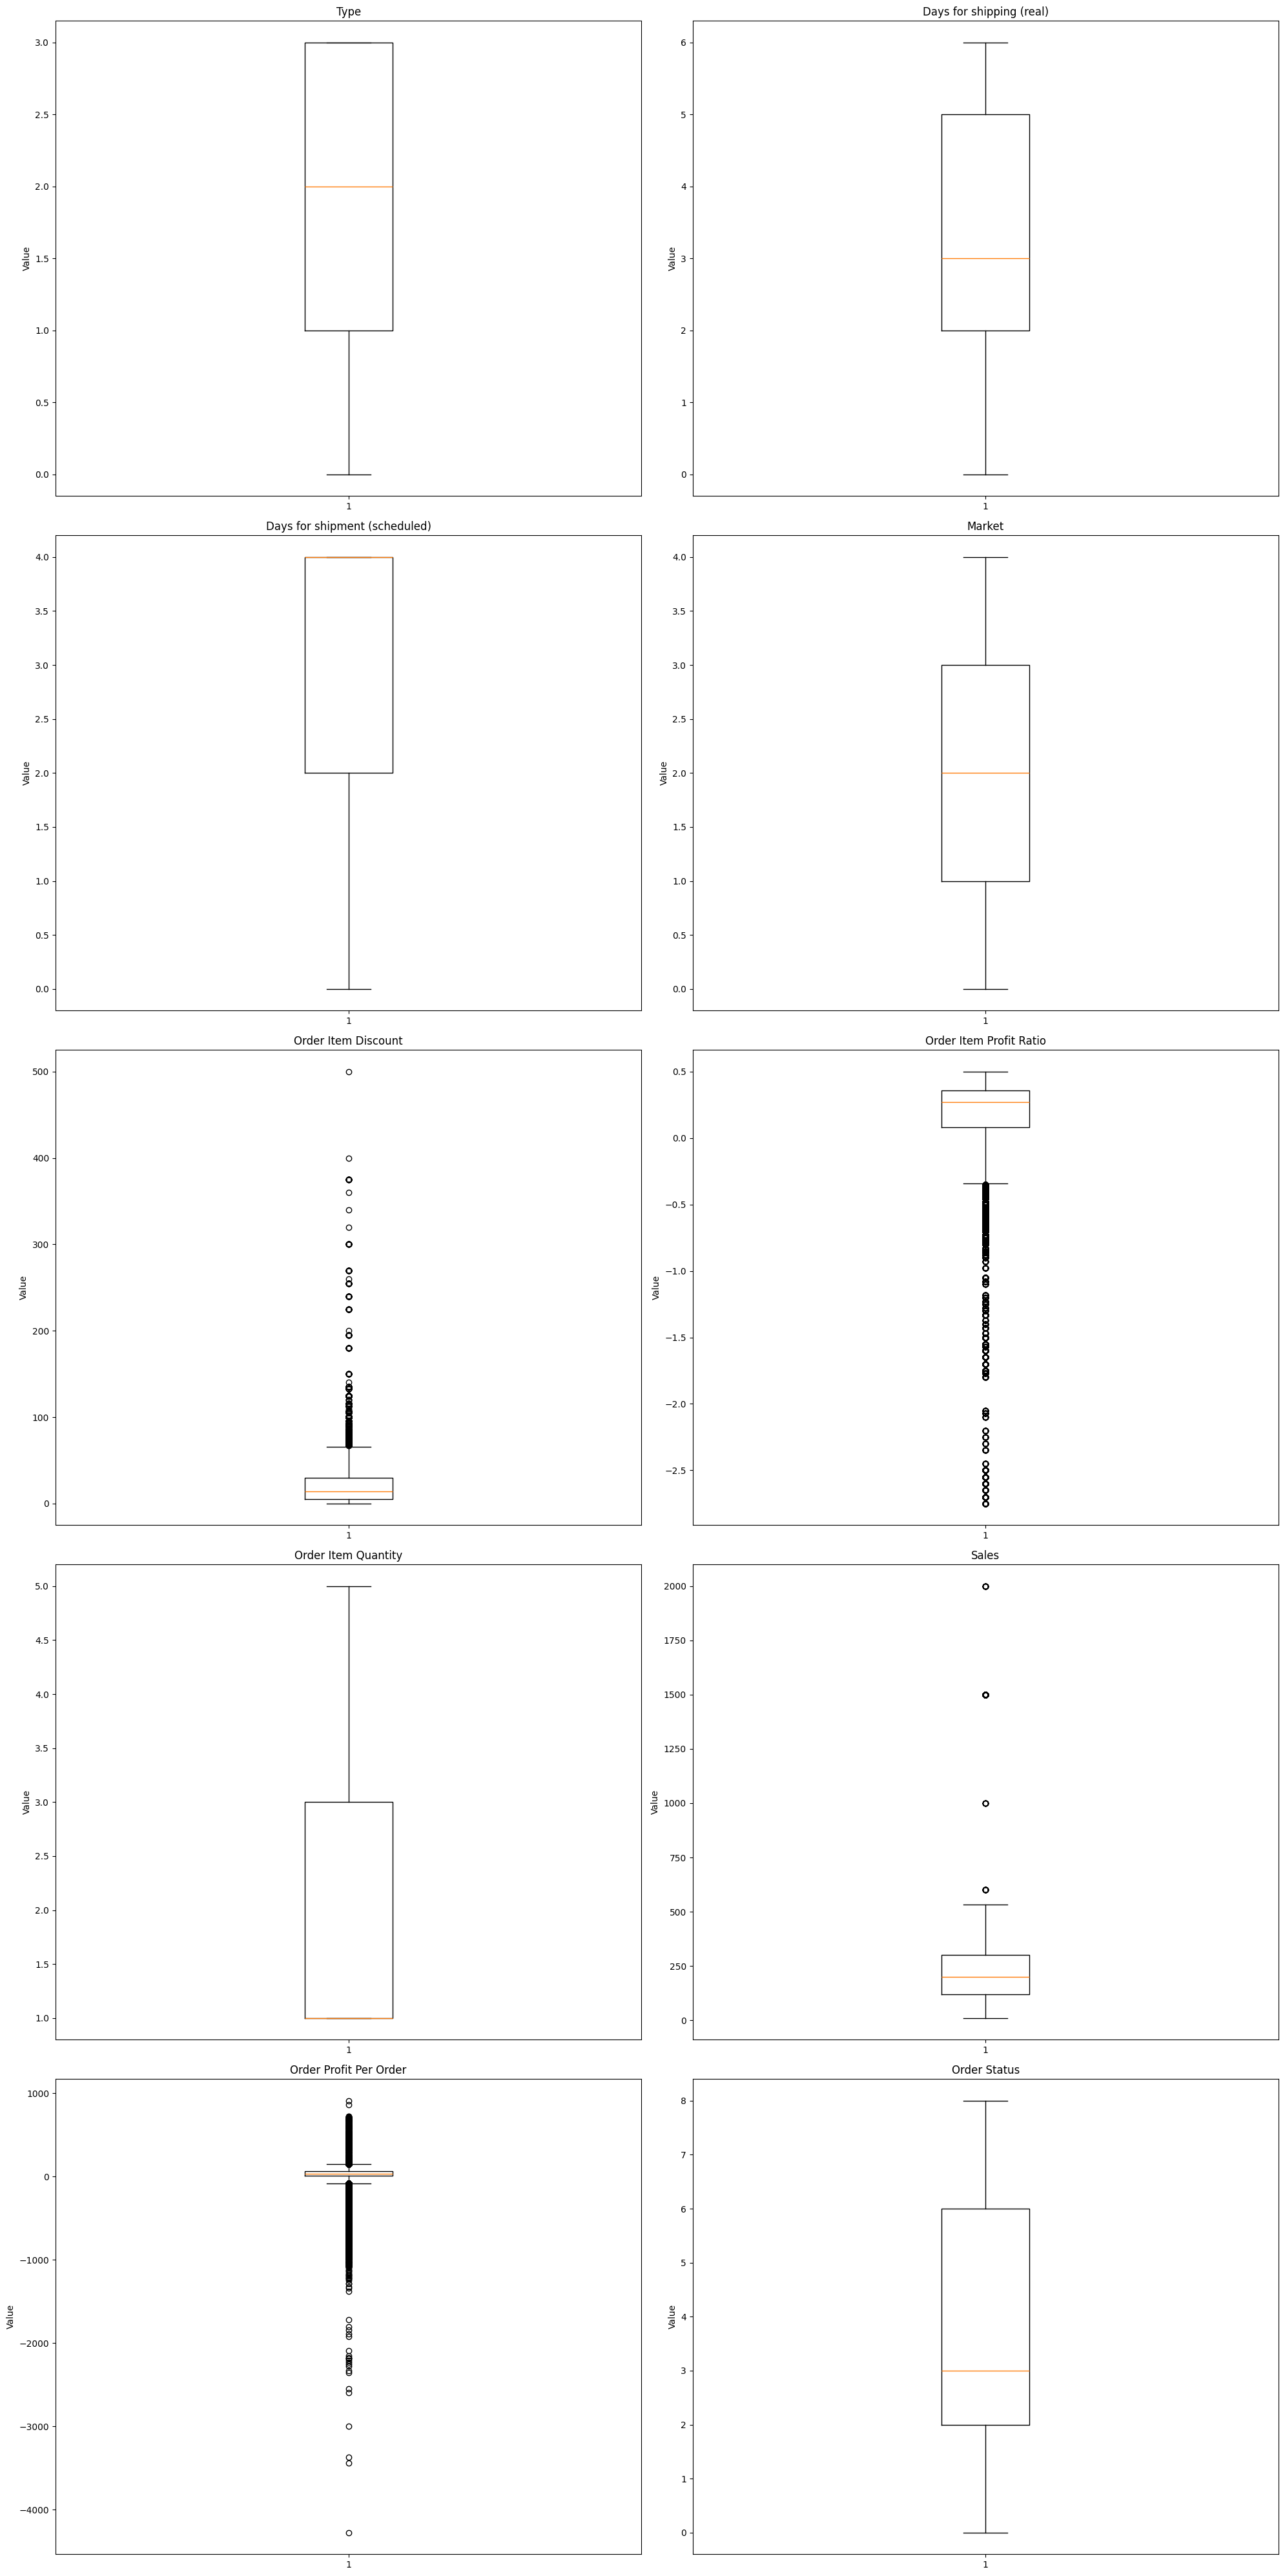

In [27]:
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    ax.boxplot(encoded_df[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [28]:
y = encoded_df['Days for shipping (real)']
X = encoded_df.drop('Days for shipping (real)',axis=1)

In [29]:
def decimal_scaling(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            max_val = df[col].abs().max()
            factor = 10 ** len(str(int(max_val)))
            df[col] = df[col] / factor
    return df

X = decimal_scaling(X)
X

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,0.1,0.4,0.009125,0.031464,0.0,0.0,0.73,0.40,0.20755,0.0,...,0.009125,0.15,0.0475,0.2,0.1360,0.73,0.032775,0.0,0.03250,0.3
1,0.3,0.4,-0.024909,0.031136,0.1,0.1,0.73,0.40,0.19492,0.0,...,-0.024909,0.13,0.0841,0.5,0.1360,0.73,0.032775,0.0,0.20134,0.3
2,0.0,0.4,-0.024778,0.030972,0.3,0.0,0.73,0.40,0.19491,0.0,...,-0.024778,0.13,0.0841,0.1,0.1360,0.73,0.032775,0.0,0.19905,0.3
3,0.1,0.4,0.002286,0.030481,0.0,0.0,0.73,0.40,0.19490,0.2,...,0.002286,0.11,0.0835,0.2,0.1360,0.73,0.032775,0.0,0.19677,0.3
4,0.2,0.4,0.013421,0.029825,0.0,0.0,0.73,0.40,0.19489,0.1,...,0.013421,0.11,0.0835,0.6,0.1360,0.73,0.032775,0.0,0.19453,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0.0,0.4,0.004000,0.039998,0.3,0.0,0.45,0.18,0.01005,0.2,...,0.004000,0.07,0.0913,0.1,0.1004,0.45,0.039998,0.0,0.20487,0.3
180515,0.1,0.2,-0.061377,0.039598,0.1,0.1,0.45,0.18,0.09141,0.1,...,-0.061377,0.07,0.0770,0.2,0.1004,0.45,0.039998,0.0,0.20264,0.2
180516,0.3,0.4,0.014111,0.039198,0.1,0.1,0.45,0.18,0.00291,0.1,...,0.014111,0.11,0.0088,0.5,0.1004,0.45,0.039998,0.0,0.20481,0.3
180517,0.2,0.4,0.018623,0.038798,0.0,0.0,0.45,0.18,0.02813,0.0,...,0.018623,0.11,0.0088,0.6,0.1004,0.45,0.039998,0.0,0.20039,0.3


In [30]:
y.unique()

array([3, 5, 4, 2, 6, 0, 1], dtype=int64)

In [31]:
y.value_counts()

Days for shipping (real)
2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [33]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Perceptron': Perceptron()
}

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

model_scores = {}  

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Accuracy Score: {acc_score}\n')
    model_scores[name] = acc_score  


Decision Tree:
  Accuracy Score: 0.9200642588078883

Random Forest:
  Accuracy Score: 0.9168513184134722

K-Nearest Neighbors:
  Accuracy Score: 0.645690228229559

Naive Bayes:
  Accuracy Score: 0.5909594504764015

Linear Discriminant Analysis:
  Accuracy Score: 0.5938400177265677

XGBoost:
  Accuracy Score: 0.8176933303789053

Learning rate set to 0.102582
0:	learn: 1.6159672	total: 374ms	remaining: 6m 14s
1:	learn: 1.4262705	total: 500ms	remaining: 4m 9s
2:	learn: 1.2907001	total: 599ms	remaining: 3m 19s
3:	learn: 1.1865337	total: 694ms	remaining: 2m 52s
4:	learn: 1.1032565	total: 781ms	remaining: 2m 35s
5:	learn: 1.0349569	total: 871ms	remaining: 2m 24s
6:	learn: 0.9794405	total: 956ms	remaining: 2m 15s
7:	learn: 0.9309627	total: 1.04s	remaining: 2m 9s
8:	learn: 0.8904218	total: 1.14s	remaining: 2m 5s
9:	learn: 0.8558711	total: 1.24s	remaining: 2m 2s
10:	learn: 0.8252971	total: 1.35s	remaining: 2m 1s
11:	learn: 0.7987453	total: 1.45s	remaining: 1m 59s
12:	learn: 0.7747538	total: 1.5

C:\Users\kedar\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
  Accuracy Score: 0.5843119875914026

Perceptron:
  Accuracy Score: 0.6042543762463993



In [36]:
dt_classifier = DecisionTreeClassifier(criterion='gini',
                                       max_depth=18, 
                                       max_features=None,
                                       min_samples_leaf=1,
                                       min_samples_split=12,
                                       splitter='random', 
                                       random_state=42)

rf_classifier = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=14, 
                                         max_features='sqrt', min_samples_leaf=11, 
                                         min_samples_split=19, n_estimators=170, 
                                         random_state=42)

In [37]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[
    ('dt', dt_classifier),
    ('rf', rf_classifier)
], voting='hard')

In [38]:
ensemble_classifier.fit(X_train, y_train)

y_pred = ensemble_classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred,output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       466
           1       1.00      0.98      0.99       459
           2       0.82      0.96      0.89      5660
           3       0.69      0.52      0.59      2831
           4       0.85      0.89      0.87      2845
           5       0.62      0.73      0.67      2865
           6       0.75      0.53      0.62      2926

    accuracy                           0.78     18052
   macro avg       0.82      0.80      0.80     18052
weighted avg       0.77      0.78      0.77     18052



In [40]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [41]:
acc = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       466
           1       0.99      1.00      1.00       459
           2       0.96      0.96      0.96      5660
           3       0.88      0.87      0.88      2831
           4       0.96      0.96      0.96      2845
           5       0.86      0.88      0.87      2865
           6       0.88      0.87      0.87      2926

    accuracy                           0.92     18052
   macro avg       0.93      0.93      0.93     18052
weighted avg       0.92      0.92      0.92     18052



In [42]:
model1 = DecisionTreeClassifier()
X_train_new = X_train.drop(['Latitude','Delivery Status','Shipping Mode','Customer Id','Longitude','Market','Benefit per order'],axis=1)
X_test_new = X_test.drop(['Latitude','Delivery Status','Shipping Mode','Customer Id','Longitude','Market','Benefit per order'],axis=1)
model1.fit(X_train_new,y_train)
y_pred1 = model1.predict(X_test_new)
acc = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1,output_dict=True)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       459
           2       0.94      0.95      0.94      5660
           3       0.85      0.86      0.85      2831
           4       0.87      0.86      0.87      2845
           5       0.86      0.86      0.86      2865
           6       0.87      0.87      0.87      2926

    accuracy                           0.90     18052
   macro avg       0.91      0.91      0.91     18052
weighted avg       0.90      0.90      0.90     18052



In [43]:
X_train_new = X_train_new.drop(['Product Price','Order Profit Per Order'],axis=1)
X_test_new = X_test_new.drop(['Product Price','Order Profit Per Order'],axis=1)
model1.fit(X_train_new,y_train)
y_pred1 = model1.predict(X_test_new)
from sklearn.metrics import classification_report

acc = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1,output_dict=True)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       459
           2       0.95      0.95      0.95      5660
           3       0.86      0.87      0.87      2831
           4       0.87      0.87      0.87      2845
           5       0.86      0.87      0.86      2865
           6       0.88      0.88      0.88      2926

    accuracy                           0.90     18052
   macro avg       0.92      0.92      0.92     18052
weighted avg       0.90      0.90      0.90     18052



In [44]:
X_train_new = X_train_new.drop(['Order Id','Order Customer Id','Category Name','Order Status','Category Id','Order Item Quantity'],axis=1)
X_test_new = X_test_new.drop(['Order Id','Order Customer Id','Category Name','Order Status','Category Id','Order Item Quantity'],axis=1)
model1.fit(X_train_new,y_train)
y_pred1 = model1.predict(X_test_new)

acc = accuracy_score(y_test,y_pred1)
report = classification_report(y_test,y_pred1,output_dict=True)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       466
           1       1.00      0.98      0.99       459
           2       0.93      0.92      0.92      5660
           3       0.80      0.80      0.80      2831
           4       0.81      0.81      0.81      2845
           5       0.81      0.82      0.81      2865
           6       0.83      0.82      0.83      2926

    accuracy                           0.86     18052
   macro avg       0.88      0.88      0.88     18052
weighted avg       0.86      0.86      0.86     18052

